<a href="https://colab.research.google.com/github/niponchanda/hello-world/blob/master/1stDNN_nipon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [1]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


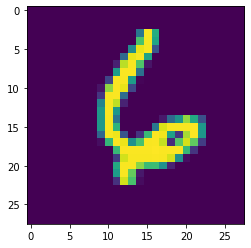

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[59000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  import sys


In [102]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 26, 26, 10)        170       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_22 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total params: 67,940
Trainable params: 67,940
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [104]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.2245 - acc: 0.9354
Epoch 2/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0813 - acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0578 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0460 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0367 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0298 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0239 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0195 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0168 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 10s 169us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [106]:
print(score)

[0.0777322008095849, 0.9821]
